# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [24]:
%pip install umap-learn

import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
%matplotlib inline
import numpy as np
import umap
import statsmodels.api as sm
import seaborn as sns
import pickle

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion
from sklearn.decomposition import PCA    # PCA
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression            # clasificar, logistic regression model   
from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               
from sklearn.model_selection import train_test_split as tts    # split data into train and test sets
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression            # logistic regression model  
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestRegressor as RFR    # el modelo , el alias es cosa mia
from sklearn.datasets import load_diabetes   # dataset
from sklearn.datasets import load_iris

Note: you may need to restart the kernel to use updated packages.


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'Age': age, 'Tardies': tardies})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

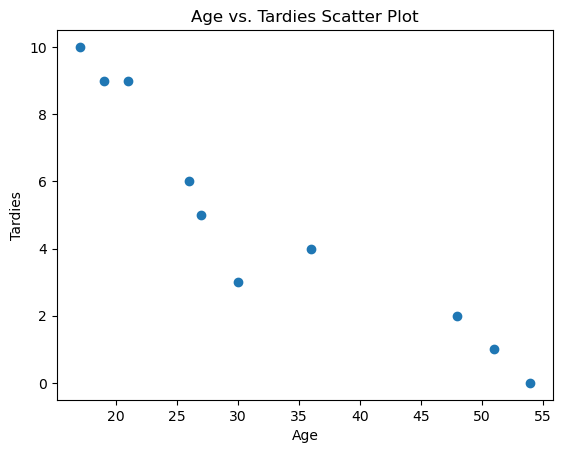

In [7]:
plt.scatter(student_data['Age'], student_data['Tardies'])


plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs. Tardies Scatter Plot')


plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Podemos observar que cuanto más joven es la persona más aumentan los retrasos.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
covariance = student_data['Age'].cov(student_data['Tardies'])
print("Covariance:", covariance)


Covariance: -45.56666666666666


In [9]:
correlation = student_data['Age'].corr(student_data['Tardies'])
print("Correlation:", correlation)

Correlation: -0.9391626886887122


In [10]:
# Los valores negativos tanto de la covarianza como de la correlación sugieren que existe una asociación negativa entre la edad y la retraso. El valor de correlación de -0,939 indica una fuerte relación lineal negativa entre las variables. Esto quiere decir que a medida que aumenta la edad de los alumnos, disminuye el número de retrasos.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
X = student_data[['Age']]
y = student_data['Tardies']

In [15]:
lm = LinReg()
lm.fit(X, y)

LinearRegression()

In [16]:
y_pred = lm.predict(X)

Plot your regression model on your scatter plot.

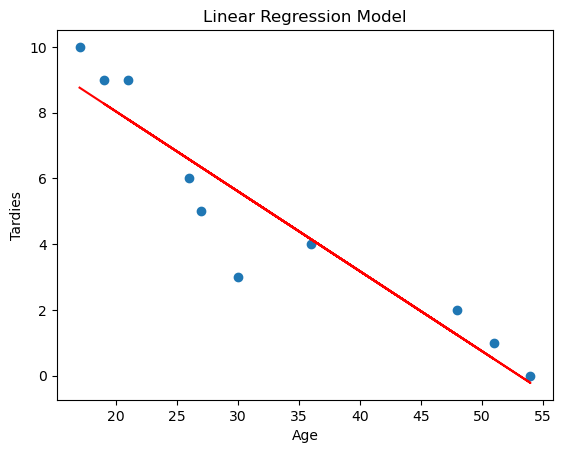

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Linear Regression Model')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)

Coefficients: [-0.24282077]
Intercept: 12.888803363135768


In [ ]:
# Podemos ver que el coeficiente es negativo (-0.2428), lo que significa que a medida que aumenta la edad, la tardanza disminuye.

In [19]:
print('R-squared:', lm.score(X, y))

R-squared: 0.8820265558250109


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
vehicles = pd.read_csv('vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

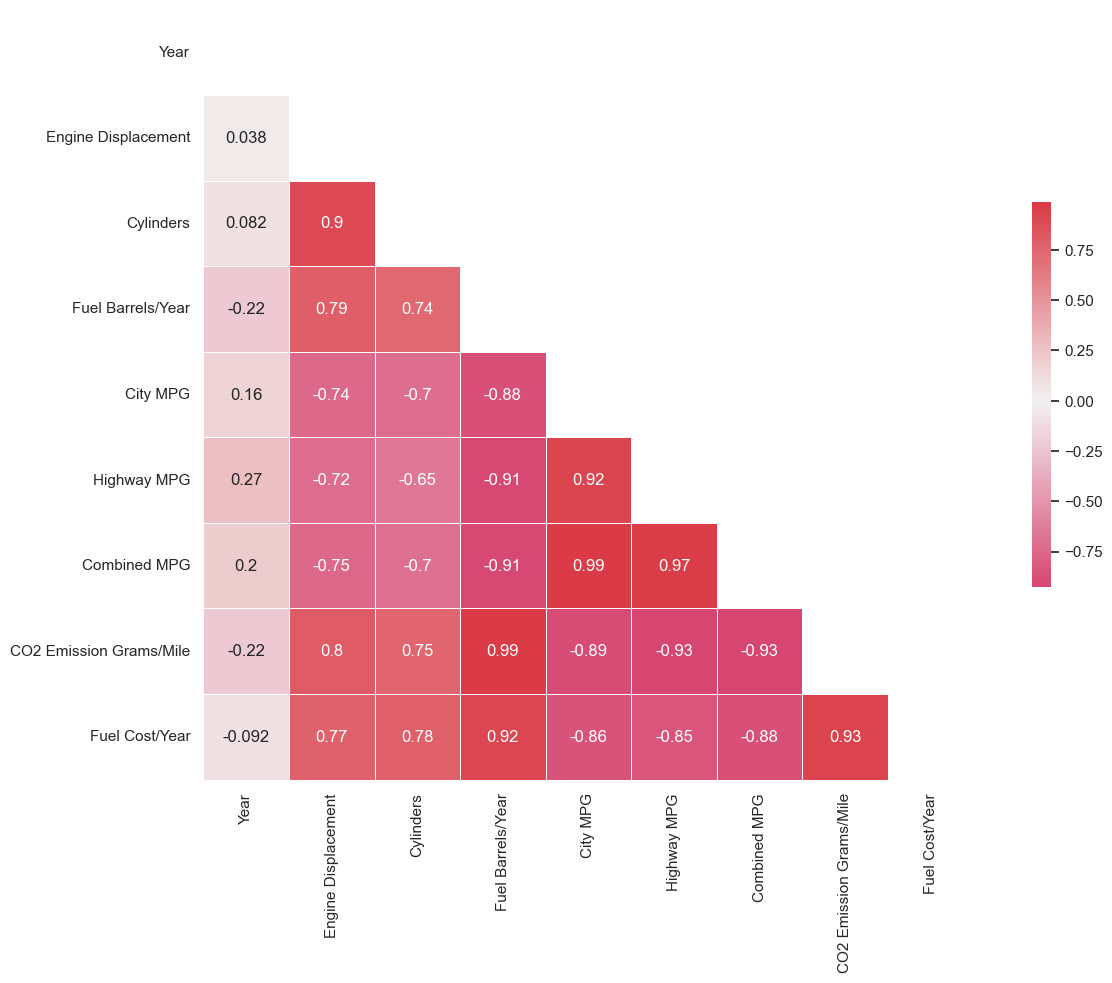

In [22]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(vehicles.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(vehicles.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [25]:
X = vehicles[['Engine Displacement', 'Fuel Barrels/Year']]
y = vehicles['CO2 Emission Grams/Mile']

x=sm.add_constant(X)



modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.974
Method:                      Least Squares   F-statistic:                 6.783e+05
Date:                     Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                             23:08:52   Log-Likelihood:            -1.5712e+05
No. Observations:                    35952   AIC:                         3.142e+05
Df Residuals:                        35949   BIC:                         3.143e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.6172      0.424     41.522      0.000      16.786      18.449
Engine Displacement     5.7432      0.121     47.469      0.000       5.506       5.980
Fuel Barrels/Year      24.9034      0.037    676.414      0.000      24.831      24.976
==============================================================================
Omnibus:                    85106.861   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        746501949.219
Skew:                          24.215   Prob(JB):                         0.00
Kurtosis:                     707.263   Cond. No.                         78.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 